In [2]:
!mkdir -p Heart_Disease_Project/data
!mv heart_disease_clean_train.csv Heart_Disease_Project/data/
!mv heart_disease_clean_test.csv Heart_Disease_Project/data/


In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Load the cleaned train dataset (from Step 2.1)
train_df = pd.read_csv("Heart_Disease_Project/data/heart_disease_clean_train.csv")
test_df  = pd.read_csv("Heart_Disease_Project/data/heart_disease_clean_test.csv")

# Split features/target
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]
X_test  = test_df.drop(columns=["target"])
y_test  = test_df["target"]

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (736, 28)  Test shape: (184, 28)


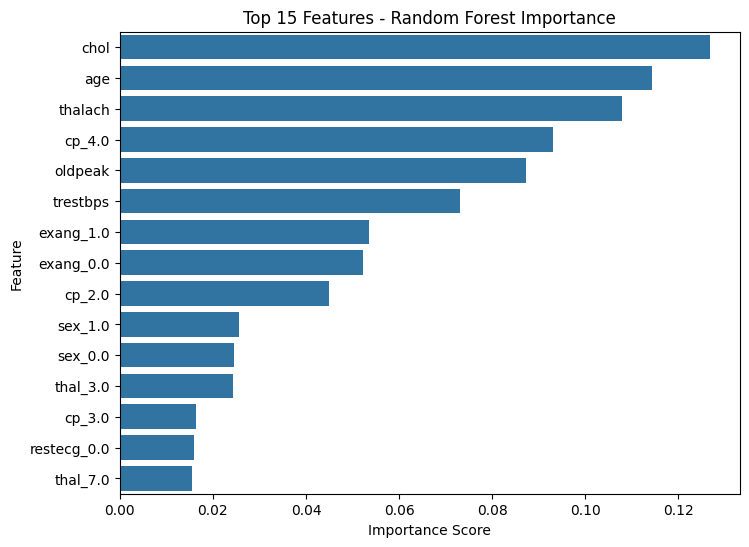

,0
chol,0.126825
age,0.114246
thalach,0.107945
cp_4.0,0.093108
oldpeak,0.087213
trestbps,0.073119
exang_1.0,0.053538
exang_0.0,0.052225
cp_2.0,0.044863
sex_1.0,0.025540


In [4]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Features - Random Forest Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

feat_imp.head(20)


In [5]:
logreg = LogisticRegression(max_iter=1000, solver="liblinear")

rfe = RFE(logreg, n_features_to_select=10)  # keep top 10
rfe.fit(X_train, y_train)

rfe_ranking = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()
selected_rfe = rfe_ranking[rfe_ranking==1].index.tolist()

print("RFE Selected Features:", selected_rfe)


RFE Selected Features: ['age', 'chol', 'thalach', 'oldpeak', 'sex_0.0', 'cp_2.0', 'cp_4.0', 'exang_1.0', 'slope_1.0', 'ca_0.0']


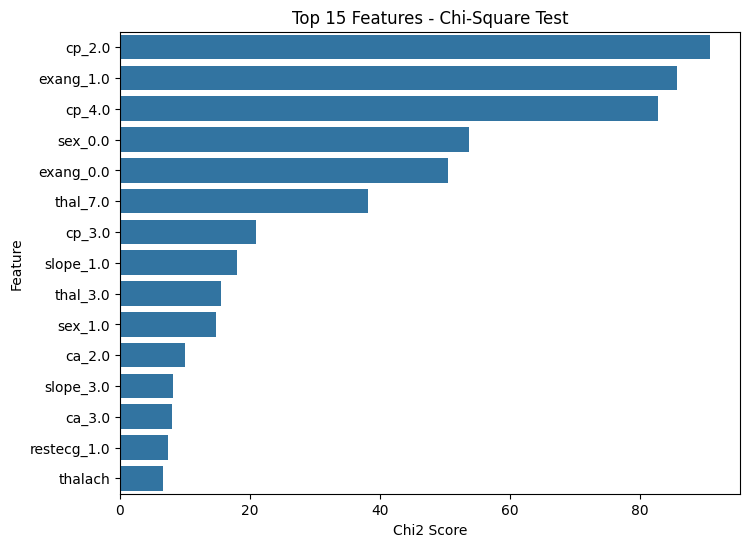

,0
cp_2.0,90.831761
exang_1.0,85.667872
cp_4.0,82.778618
sex_0.0,53.662595
exang_0.0,50.512590
thal_7.0,38.203779
cp_3.0,20.866083
slope_1.0,17.970643
thal_3.0,15.587281
sex_1.0,14.787439


In [6]:
# Chi2 requires non-negative values → scale features to [0,1]
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)

chi_scores, p_vals = chi2(X_train_mm, y_train)
chi2_res = pd.Series(chi_scores, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=chi2_res.values[:15], y=chi2_res.index[:15])
plt.title("Top 15 Features - Chi-Square Test")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.show()

chi2_res.head(20)


In [7]:


top_rf = set(feat_imp.head(15).index)
top_chi = set(chi2_res.head(15).index)
top_rfe = set(selected_rfe)

final_features = list(top_rf.union(top_chi).union(top_rfe))
print("Final selected features (union of methods):", final_features)
print("Total selected:", len(final_features))

# Reduce dataset to only these features
X_train_reduced = X_train[final_features]
X_test_reduced  = X_test[final_features]

# Save reduced datasets
train_reduced = pd.concat([X_train_reduced, y_train], axis=1)
test_reduced  = pd.concat([X_test_reduced, y_test], axis=1)

train_reduced.to_csv("Heart_Disease_Project/data/heart_disease_reduced_train.csv", index=False)
test_reduced.to_csv("Heart_Disease_Project/data/heart_disease_reduced_test.csv", index=False)
print("Saved reduced feature datasets!")


Final selected features (union of methods): ['thalach', 'exang_1.0', 'chol', 'ca_2.0', 'ca_3.0', 'cp_4.0', 'exang_0.0', 'thal_3.0', 'sex_1.0', 'slope_3.0', 'trestbps', 'restecg_1.0', 'oldpeak', 'ca_0.0', 'slope_1.0', 'cp_3.0', 'cp_2.0', 'age', 'thal_7.0', 'restecg_0.0', 'sex_0.0']
Total selected: 21
Saved reduced feature datasets!
